In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import manifold

import pandas as pd
import numpy as np

#tf.keras.backend.set_floatx('float64')

In [3]:
X = np.load('data/lightCurves/lc_griz_n100.npy')

In [4]:
X_train, X_test = train_test_split(X[:1000,:,1], test_size=0.2, random_state=0)
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)

X_train.shape = (800, 100)
X_test.shape = (200, 100)


In [5]:
layer1Dim = 30
layerLatentDim = 10

In [6]:
class Autoencoder(Model):
    def __init__(self, layer_latent_dim, layer_1_dim=None):
        super(Autoencoder, self).__init__()
        self.latent_layer_dim = layer_latent_dim
        
        self.encoder = tf.keras.Sequential([
            #layers.Dense(layer_1_dim, activation='relu'),
            layers.Dense(layer_latent_dim, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            #layers.Dense(layer_1_dim, activation='relu'),
            layers.Dense(100),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
AE = Autoencoder(layerLatentDim)

In [8]:
AE.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [30]:
history = AE.fit(X_train, X_train,
                epochs=100,
                shuffle=False,
                validation_data=(X_test, X_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 105us/sample - loss: 0.0193 - val_loss: 0.0249
Epoch 2/100
800/800 [==============================] - 0s 81us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 3/100
800/800 [==============================] - 0s 59us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 4/100
800/800 [==============================] - 0s 60us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 5/100
800/800 [==============================] - 0s 59us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 6/100
800/800 [==============================] - 0s 56us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 7/100
800/800 [==============================] - 0s 56us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 8/100
800/800 [==============================] - 0s 66us/sample - loss: 0.0194 - val_loss: 0.0249
Epoch 9/100
800/800 [==============================] - 0s 65us/sample - loss: 0.0194 - val_loss: 0.0250
Epoch 10/100
800/

800/800 [==============================] - 0s 106us/sample - loss: 0.0195 - val_loss: 0.0255
Epoch 79/100
800/800 [==============================] - 0s 84us/sample - loss: 0.0195 - val_loss: 0.0255
Epoch 80/100
800/800 [==============================] - 0s 182us/sample - loss: 0.0195 - val_loss: 0.0255
Epoch 81/100
800/800 [==============================] - 0s 93us/sample - loss: 0.0195 - val_loss: 0.0255
Epoch 82/100
800/800 [==============================] - 0s 72us/sample - loss: 0.0195 - val_loss: 0.0255
Epoch 83/100
800/800 [==============================] - 0s 64us/sample - loss: 0.0195 - val_loss: 0.0256
Epoch 84/100
800/800 [==============================] - 0s 55us/sample - loss: 0.0196 - val_loss: 0.0256
Epoch 85/100
800/800 [==============================] - 0s 50us/sample - loss: 0.0196 - val_loss: 0.0256
Epoch 86/100
800/800 [==============================] - 0s 57us/sample - loss: 0.0196 - val_loss: 0.0256
Epoch 87/100
800/800 [==============================] - 0s 56us/sa

In [10]:
import matplotlib.pyplot as plt

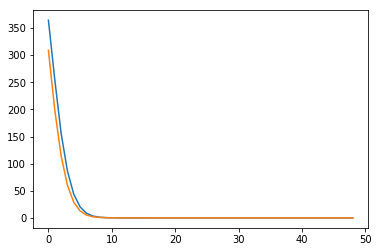

In [11]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])

In [12]:
history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 25,
 'samples': 800,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [34]:
enc_train = AE.encoder(X_train).numpy()
dec_train = AE.decoder(enc_train).numpy()

enc_test = AE.encoder(X_test).numpy()
dec_test = AE.decoder(enc_test).numpy()

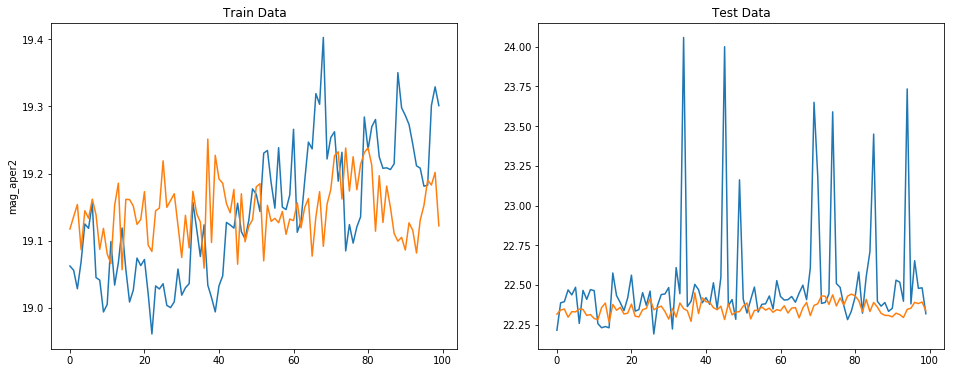

In [35]:
index = 3;
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(X_train[index])
plt.plot(dec_train[index])
plt.ylabel('mag_aper2')
plt.title('Train Data')

plt.subplot(1,2,2)
plt.plot(X_test[index])
plt.plot(dec_test[index])
plt.title('Test Data');

In [36]:
AE.encoder.save('encoder')
AE.decoder.save('decoder')

INFO:tensorflow:Assets written to: encoder\assets
INFO:tensorflow:Assets written to: decoder\assets


In [18]:
AEtest = Autoencoder(layerLatentDim)

In [37]:
AEtest.encoder = tf.keras.models.load_model('encoder')
AEtest.decoder = tf.keras.models.load_model('decoder')

In [24]:
AEtest.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [38]:
enc_train = AEtest.encoder(X_train).numpy()
dec_train = AEtest.decoder(enc_train).numpy()

enc_test = AEtest.encoder(X_test).numpy()
dec_test = AEtest.decoder(enc_test).numpy()

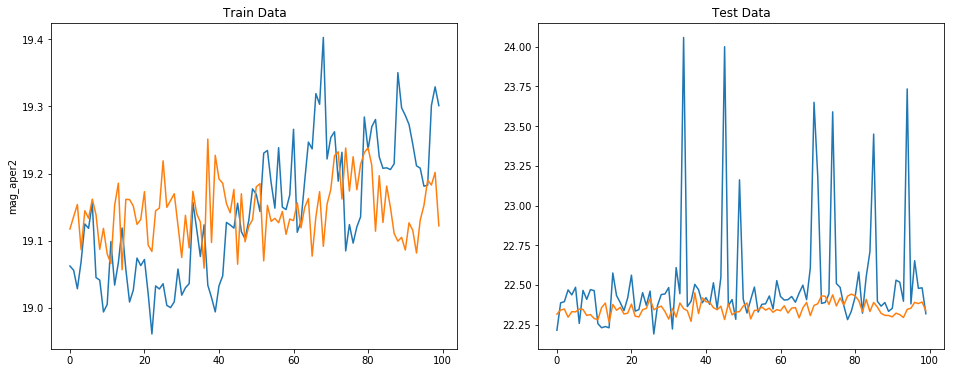

In [39]:
index = 3;
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(X_train[index])
plt.plot(dec_train[index])
plt.ylabel('mag_aper2')
plt.title('Train Data')

plt.subplot(1,2,2)
plt.plot(X_test[index])
plt.plot(dec_test[index])
plt.title('Test Data');

In [55]:
pd.DataFrame(history.history).to_csv('history.csv', index=False)

In [58]:
pd.DataFrame(history.params).to_csv('params.csv', index=False)

In [59]:
hisfoo = pd.read_csv('history.csv')
parfoo = pd.read_csv('params.csv')

In [60]:
hisfoo, parfoo

(        loss  val_loss
 0   0.019349  0.024876
 1   0.019352  0.024885
 2   0.019355  0.024894
 3   0.019358  0.024903
 4   0.019361  0.024912
 ..       ...       ...
 95  0.019565  0.025692
 96  0.019567  0.025706
 97  0.019570  0.025722
 98  0.019574  0.025738
 99  0.019578  0.025755
 
 [100 rows x 2 columns],
    batch_size  epochs  steps  samples  verbose  do_validation   metrics
 0          32     100     25      800        0           True      loss
 1          32     100     25      800        0           True  val_loss)

In [63]:
AE.latent_layer_dim

10